### Basic Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from windrose import WindroseAxes



In [4]:
RAW_DATA = "../data/togo-dapaong_qc.csv"
CLEANED_DATA = "../data/togo-dapaong_cleaned.csv"
data = pd.read_csv(RAW_DATA)
data.shape

(525600, 19)

### Summary Statistics & Missing-value Report

In [5]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
missing_count = data.isna().sum()
missing_percent = (missing_count/len(data))*100
missing_data = missing_percent[missing_percent > 5]

print(f"Columns with missing Value > 5%: {missing_data}")
missing_count

Columns with missing Value > 5%: Comments    100.0
dtype: float64


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Outlier detection & basic Cleaning

In [9]:
clean_data = data.drop(['Comments'], axis=1)
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb']
zscore = np.abs(zscore(clean_data[key_columns]))
outlier_flag = (zscore>3).any(axis=1)
clean_data['Outlier_flag'] = outlier_flag
clean_data[clean_data['Outlier_flag']]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Outlier_flag
7860,2021-10-30 11:01,934.0,989.8,84.9,977.9,951.0,30.2,64.5,3.3,4.9,1.2,278.4,18.6,977,0,0.0,54.6,62.3,True
39532,2021-11-21 10:53,893.0,905.5,138.3,976.6,939.0,34.0,19.1,3.5,4.9,0.7,79.3,13.7,975,0,0.0,47.5,53.0,True
39542,2021-11-21 11:03,904.0,906.1,140.7,986.8,949.0,34.4,18.5,3.9,5.4,0.8,80.8,12.9,975,0,0.0,48.6,54.2,True
39543,2021-11-21 11:04,905.0,907.7,140.9,988.9,951.0,34.4,18.9,2.8,4.6,0.8,87.2,20.4,975,0,0.0,48.5,54.0,True
39544,2021-11-21 11:05,907.0,907.4,142.0,989.9,953.0,34.5,18.3,3.3,4.4,0.6,75.1,15.1,975,0,0.0,48.9,54.3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510473,2022-10-14 11:54,709.5,63.7,629.8,703.1,694.9,30.2,66.6,3.5,4.4,0.8,167.0,15.2,977,0,0.0,46.8,51.6,True
510474,2022-10-14 11:55,677.8,40.6,621.7,670.1,662.2,30.2,66.7,2.8,3.6,0.6,175.1,19.7,977,0,0.0,46.8,51.6,True
510475,2022-10-14 11:56,659.5,29.7,614.9,651.0,643.4,30.3,66.1,4.1,4.9,0.5,174.0,11.5,977,0,0.0,46.8,51.6,True
510476,2022-10-14 11:57,660.1,40.7,605.6,653.2,645.6,30.2,66.0,3.7,4.6,0.7,165.4,21.6,977,0,0.0,46.6,51.4,True


### Replace outliers with median

In [11]:
for col in key_columns:
    median = clean_data[col].median()
    clean_data.loc[clean_data['Outlier_flag'], col] = median
clean_data[clean_data['Outlier_flag']]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Outlier_flag
7860,2021-10-30 11:01,2.1,0.0,2.5,977.9,951.0,27.2,64.5,3.3,4.9,1.2,278.4,18.6,977,0,0.0,54.6,62.3,True
39532,2021-11-21 10:53,2.1,0.0,2.5,976.6,939.0,27.2,19.1,3.5,4.9,0.7,79.3,13.7,975,0,0.0,47.5,53.0,True
39542,2021-11-21 11:03,2.1,0.0,2.5,986.8,949.0,27.2,18.5,3.9,5.4,0.8,80.8,12.9,975,0,0.0,48.6,54.2,True
39543,2021-11-21 11:04,2.1,0.0,2.5,988.9,951.0,27.2,18.9,2.8,4.6,0.8,87.2,20.4,975,0,0.0,48.5,54.0,True
39544,2021-11-21 11:05,2.1,0.0,2.5,989.9,953.0,27.2,18.3,3.3,4.4,0.6,75.1,15.1,975,0,0.0,48.9,54.3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510473,2022-10-14 11:54,2.1,0.0,2.5,703.1,694.9,27.2,66.6,3.5,4.4,0.8,167.0,15.2,977,0,0.0,46.8,51.6,True
510474,2022-10-14 11:55,2.1,0.0,2.5,670.1,662.2,27.2,66.7,2.8,3.6,0.6,175.1,19.7,977,0,0.0,46.8,51.6,True
510475,2022-10-14 11:56,2.1,0.0,2.5,651.0,643.4,27.2,66.1,4.1,4.9,0.5,174.0,11.5,977,0,0.0,46.8,51.6,True
510476,2022-10-14 11:57,2.1,0.0,2.5,653.2,645.6,27.2,66.0,3.7,4.6,0.7,165.4,21.6,977,0,0.0,46.6,51.4,True


### Saving Clean Data

In [13]:
clean_data.to_csv(CLEANED_DATA)
print(f'DAta saved to {CLEANED_DATA}')

DAta saved to ../data/togo-dapaong_cleaned.csv


### Time Series Analysis

c:\Users\PC\Documents\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


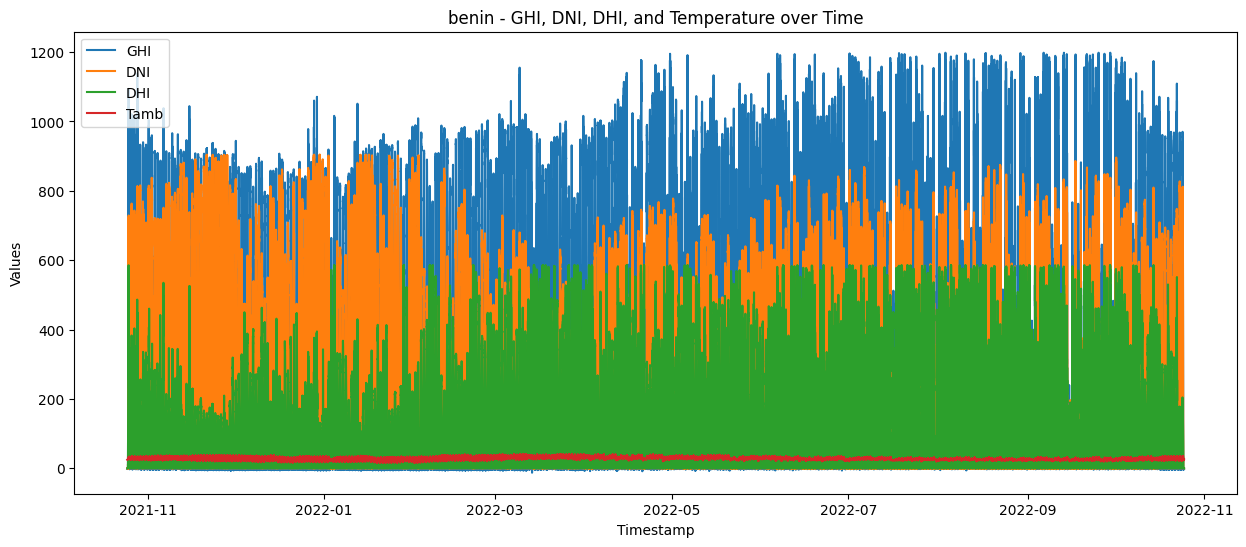

In [15]:
clean_data['Timestamp'] = pd.to_datetime(clean_data['Timestamp'])
clean_data = clean_data.sort_values('Timestamp')
plt.figure(figsize=(15,6))

sns.lineplot(x='Timestamp', y='GHI', data=clean_data, label='GHI')
sns.lineplot(x='Timestamp', y='DNI', data=clean_data, label='DNI')
sns.lineplot(x='Timestamp', y='DHI', data=clean_data, label='DHI')
sns.lineplot(x='Timestamp', y='Tamb', data=clean_data, label='Tamb')
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.title("benin - GHI, DNI, DHI, and Temperature over Time")
plt.show()

### Observation Patterns by month

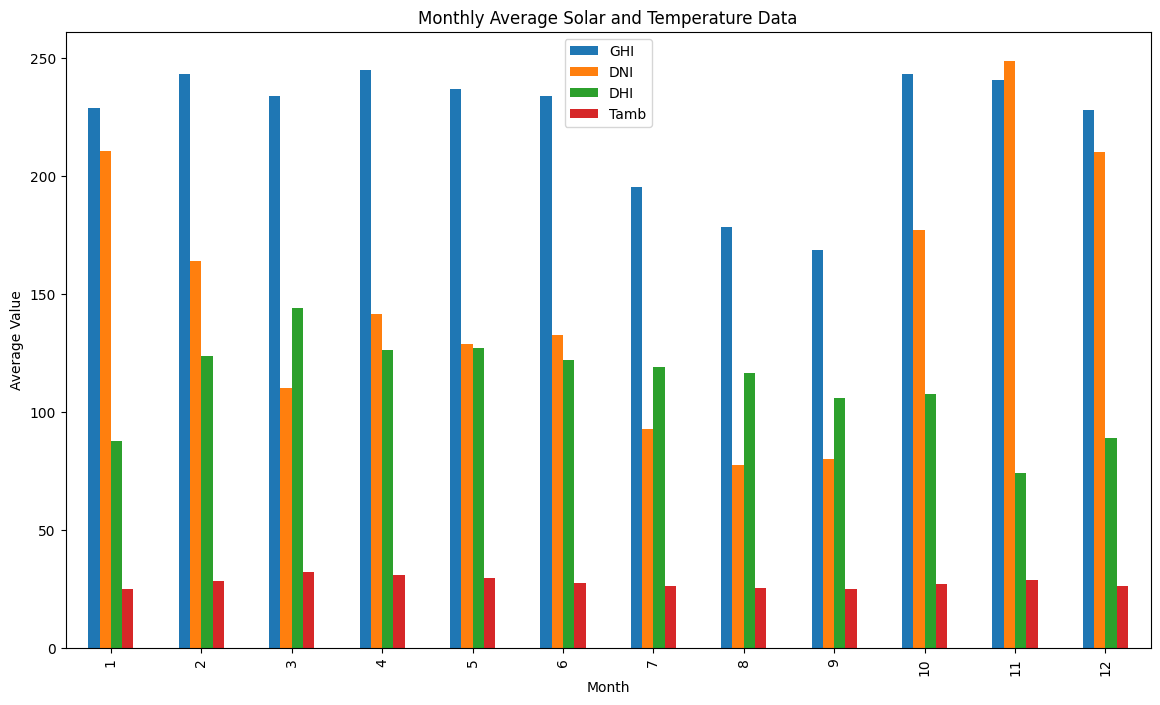

In [16]:
clean_data['Month'] = clean_data['Timestamp'].dt.month
monthly_ave = clean_data.groupby(['Month'])[key_columns].mean()
monthly_ave.plot(kind='bar', figsize=(14, 8))
plt.title("Monthly Average Solar and Temperature Data")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.show()


### Trends throughout the day

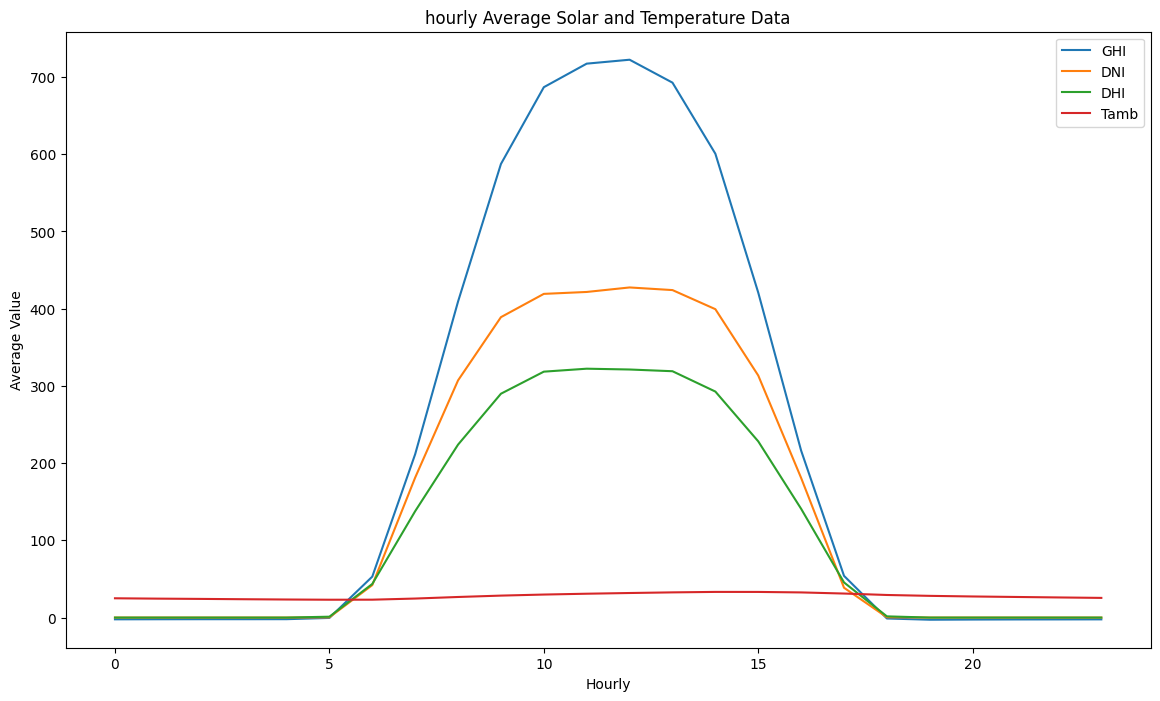

In [17]:
clean_data['Hour'] = clean_data['Timestamp'].dt.hour
monthly_ave = clean_data.groupby(['Hour'])[key_columns].mean()
monthly_ave.plot(kind='line', figsize=(14, 8))
plt.title("hourly Average Solar and Temperature Data")
plt.xlabel("Hourly")
plt.ylabel("Average Value")
plt.show()


### Cleaning Impact

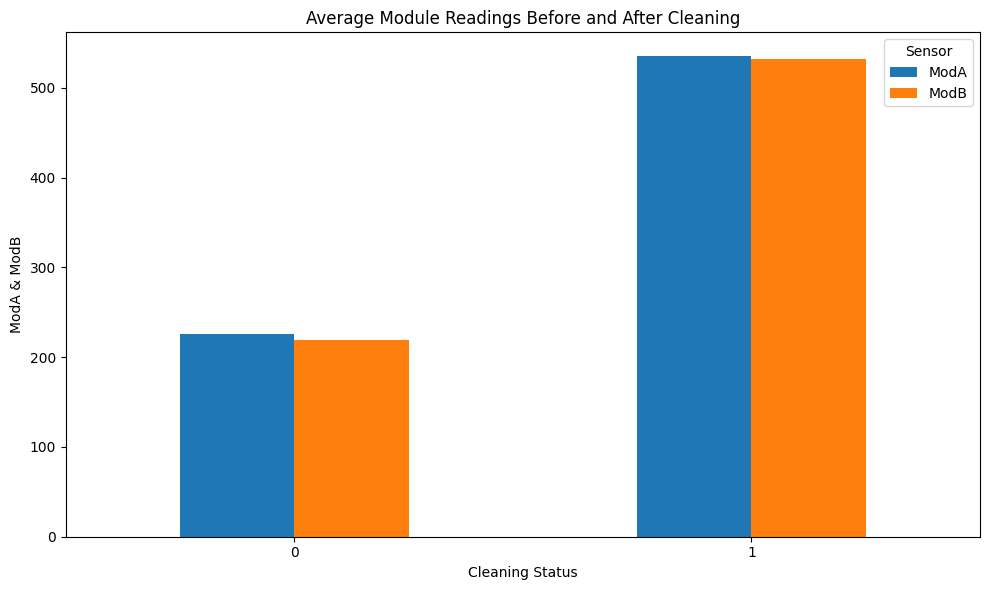

In [18]:
cleaning_flag = clean_data.groupby(['Cleaning'])[['ModA','ModB']].mean()
cleaning_flag.plot(kind='bar', figsize=(10,6))
plt.title("Average Module Readings Before and After Cleaning")
plt.xlabel("Cleaning Status")
plt.ylabel("ModA & ModB")
plt.legend(title="Sensor")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation & relationship Analysis

In [19]:
cols_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_of_colu = clean_data[cols_of_interest].corr()
mask = np.zeros_like(corr_of_colu)
upper_tri = np.triu_indices_from(mask)
mask[upper_tri] = True


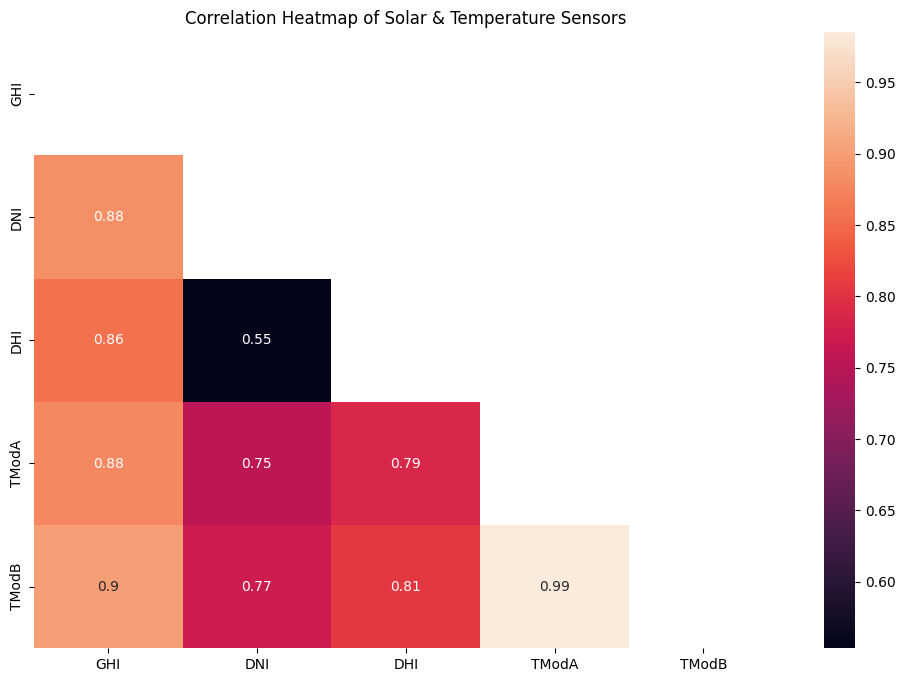

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data=corr_of_colu, mask=mask, annot=True)
plt.title("Correlation Heatmap of Solar & Temperature Sensors")
plt.show()

### Scatter Plot
#### wind vs. GHI

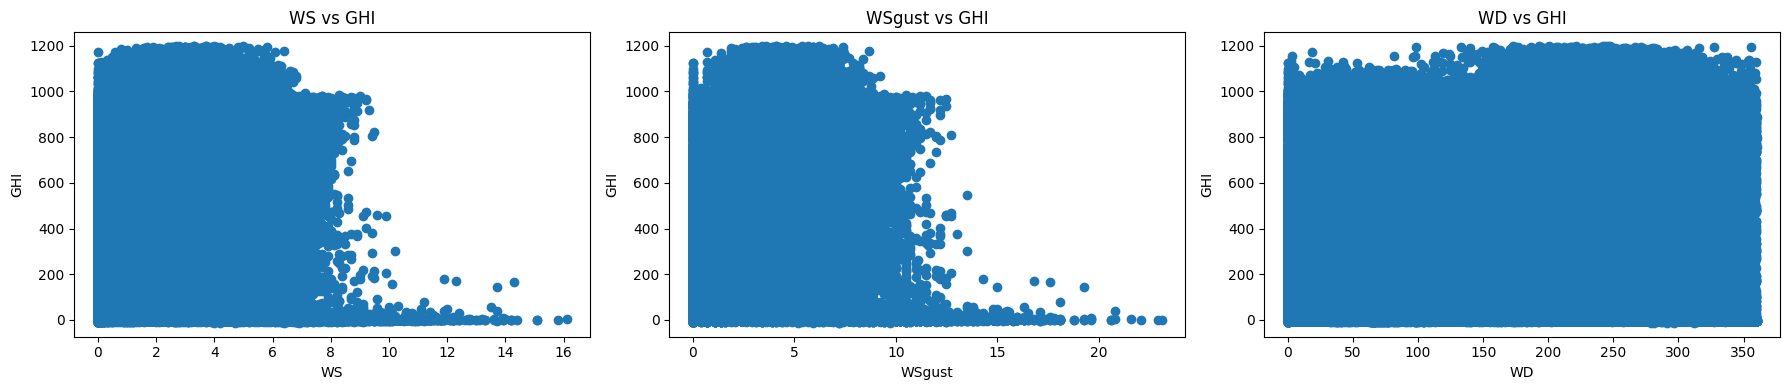

In [21]:
plt.figure(figsize=(18, 4))
plt.subplot(1,3,1)
plt.scatter(clean_data['WS'], clean_data['GHI'])
plt.title("WS vs GHI")
plt.xlabel('WS')
plt.ylabel('GHI')

plt.subplot(1,3,2)
plt.scatter(clean_data['WSgust'], clean_data['GHI'])
plt.title("WSgust vs GHI")
plt.xlabel('WSgust')
plt.ylabel('GHI')

plt.subplot(1,3,3)
plt.scatter(clean_data['WD'], clean_data['GHI'])
plt.title("WD vs GHI")
plt.xlabel('WD')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

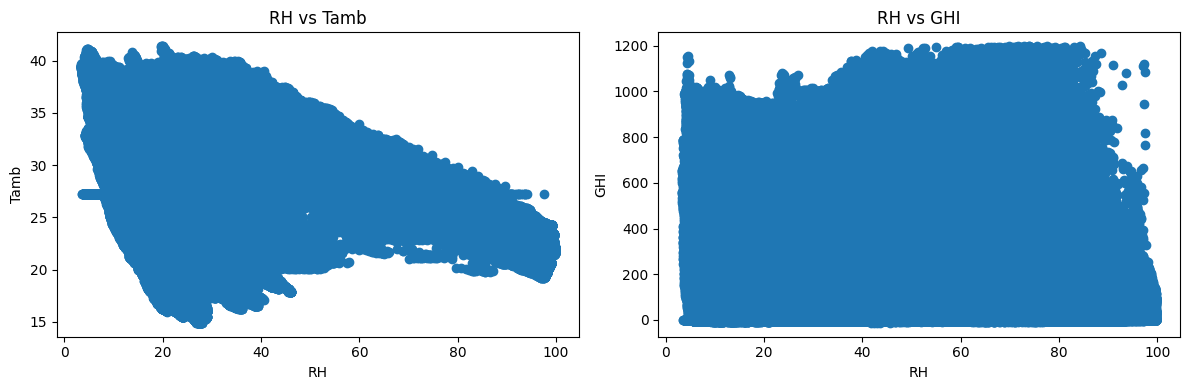

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.scatter(clean_data['RH'], clean_data['Tamb'])
plt.title("RH vs Tamb")
plt.xlabel('RH')
plt.ylabel('Tamb')

plt.subplot(1,2,2)
plt.scatter(clean_data['RH'], clean_data['GHI'])
plt.title("RH vs GHI")
plt.xlabel('RH')
plt.ylabel('GHI')
plt.tight_layout()
plt.show()

### Wind Distribution Analysis

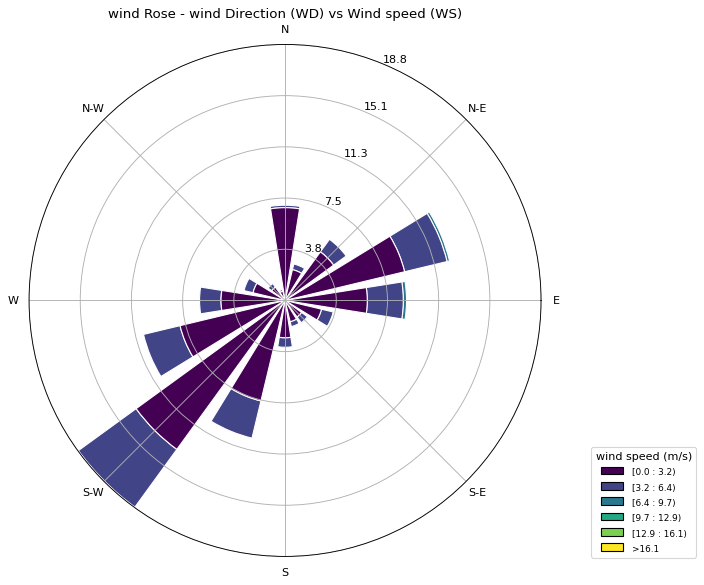

In [23]:
ax = WindroseAxes.from_ax()
ax.bar(clean_data['WD'], clean_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='wind speed (m/s)', bbox_to_anchor=(1.1,0))
plt.title("wind Rose - wind Direction (WD) vs Wind speed (WS)")
plt.show()

### Distribution Analysis(Histograms)

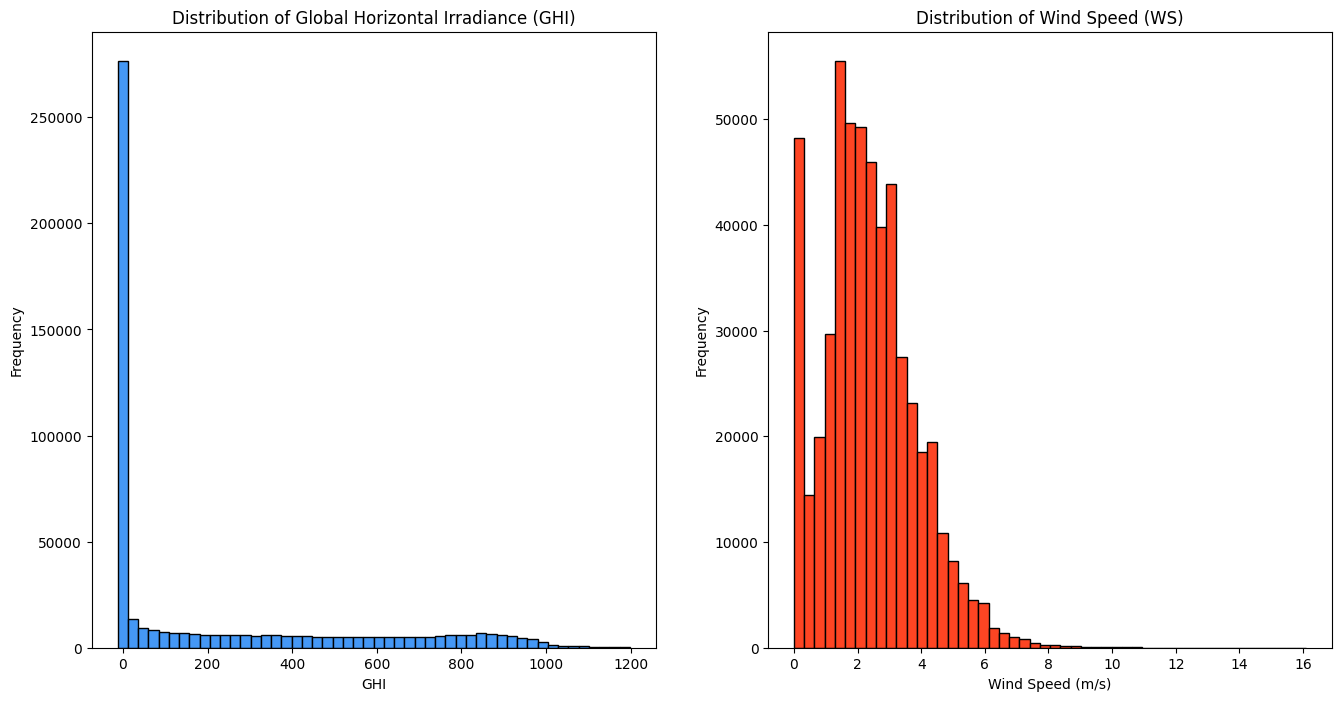

In [26]:
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.hist(clean_data['GHI'], bins=50, color='#4598f5', ec='black')
plt.title("Distribution of Global Horizontal Irradiance (GHI)")
plt.xlabel("GHI")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.hist(clean_data['WS'], bins=50, color='#fd4523', ec='black')
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Temperature Analysis

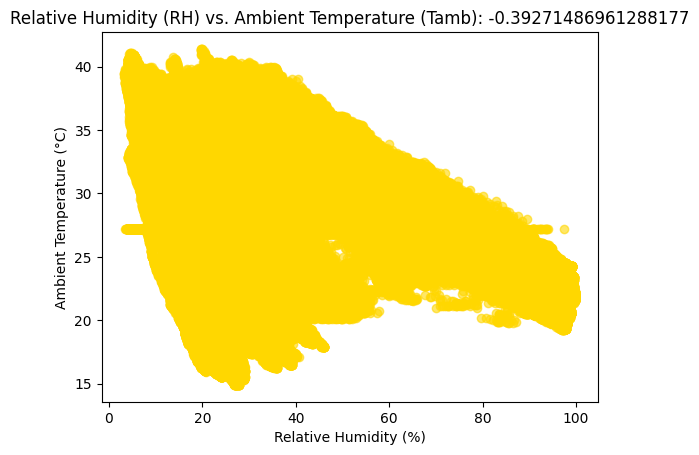

In [27]:
corr_RH_temb = clean_data['RH'].corr(clean_data['Tamb'])
plt.scatter(clean_data['RH'], clean_data['Tamb'], alpha=0.6, c='gold')
plt.title(f"Relative Humidity (RH) vs. Ambient Temperature (Tamb): {corr_RH_temb}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Ambient Temperature (°C)")
plt.show()

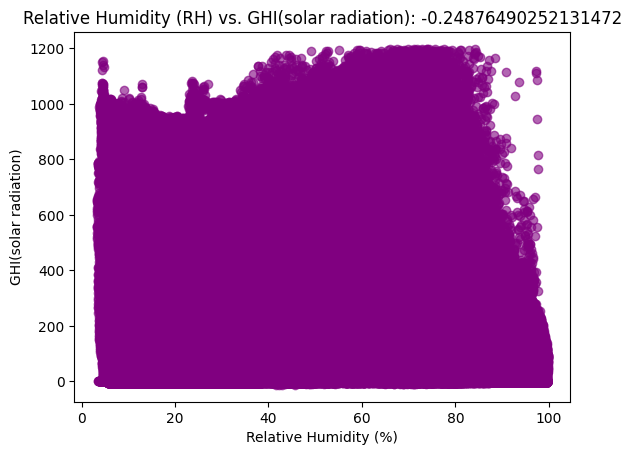

In [28]:
corr_RH_GHI = clean_data['RH'].corr(clean_data['GHI'])
plt.scatter(clean_data['RH'], clean_data['GHI'], alpha=0.6, c='purple')
plt.title(f"Relative Humidity (RH) vs. GHI(solar radiation): {corr_RH_GHI}")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("GHI(solar radiation)")
plt.show()

## Bubble Chart

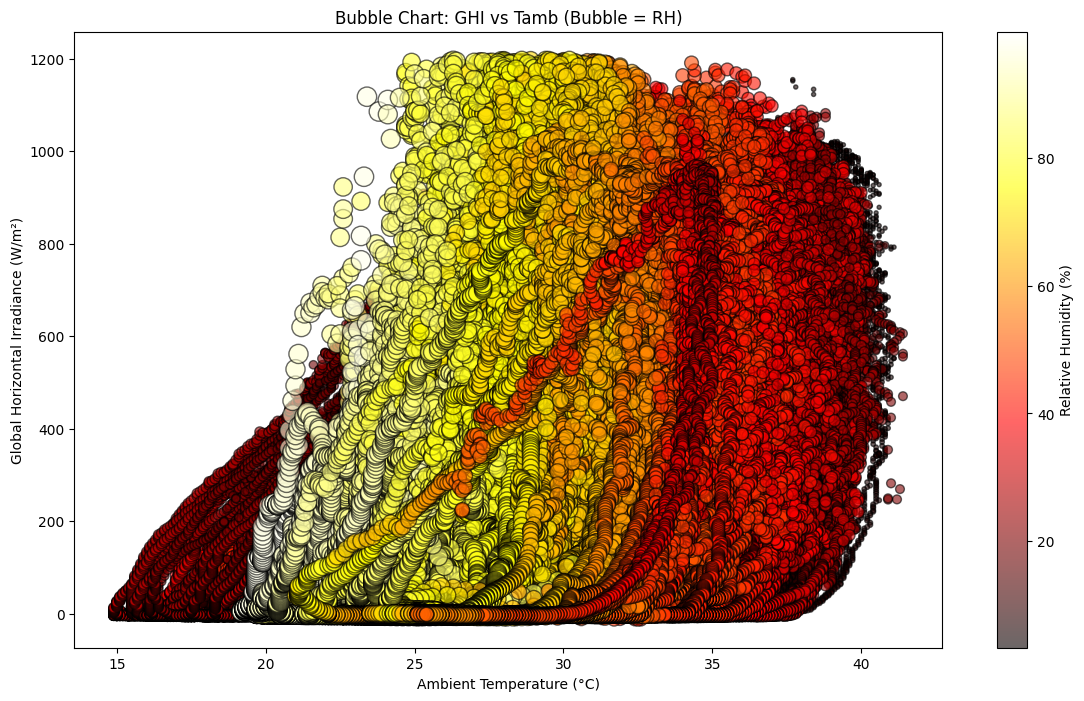

In [30]:
plt.figure(figsize=(14,8))
plt.scatter(clean_data['Tamb'], clean_data['GHI'], s=clean_data['RH']*2, c=clean_data['RH'], cmap='hot', edgecolors='black', alpha=0.6)
plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
cbar = plt.colorbar()
cbar.set_label("Relative Humidity (%)")

plt.show()